In [57]:
import numpy
from matplotlib.pyplot import *
%matplotlib inline

#C_i


def Cfunc(Yn1,Yn,dt,C):

    #p
    C[0] = (Yn1[0]-Yn[0])/dt - (-Yn1[0]**2*R1 -Yn1[0]*Yn1[1]*R2 + Yn1[2]**2*R3)


    #d
    C[1] = (Yn1[1]-Yn[1])/dt - (0.5*Yn1[0]**2*R1 -Yn1[0]*Yn1[1]*R2)


    #he3
    C[2] = (Yn1[2]-Yn[2])/dt - (-Yn1[2]**2*R3 + Yn1[0]*Yn1[1]*R2)


    #he4
    C[3] = (Yn1[3]-Yn[3])/dt - (0.5*Yn1[2]**2*R3)


    return C



#J_ij

def Jfunc(Yn1,Yn,dt,J):


    #p
    J[0,0] = 1./dt - (-2.*Yn1[0]*R1-Yn1[1]*R2)
    J[0,1] = - (-Yn1[0]*R2)
    J[0,2] = - (2*Yn1[2]*R3)
    J[0,3] = 0.



    #d
    J[1,0] = - (Yn1[0]*R1-Yn1[1]*R2)
    J[1,1] = 1./dt - (-Yn1[0]*R2)
    J[1,2] = 0.
    J[1,3] = 0.




    #he3
    J[2,0] = - (Yn1[1]*R2)
    J[2,1] = - (Yn1[0]*R2)
    J[2,2] = 1./dt - (-2.*Yn1[2]*R3)
    J[2,3] = 0.




    #he4
    J[3,0] = 0.
    J[3,1] = 0.
    J[3,2] = - (Yn1[2]*R3)
    J[3,3] = 1./dt 


    return J



def int_1step(Yn1,Yn,dt,C,J):

    C_i = Cfunc(Yn1,Yn,dt,C)
    J_i = Jfunc(Yn1,Yn,dt,J)
    J_i_inv = numpy.linalg.inv(J_i) 
    dY = - numpy.matmul(J_i_inv, C_i)
    Yn1 = Yn1 + dY
    dY_max = numpy.max(dY/Yn1)


    return Yn1,Yn,dt,C,J,dY_max


################################################################

mev = 1.6e-15
NA = 6.022e+23


#accuracy of the Raphson Newton algorithm
eps = 1.e-4



#intial abundances: H1,H2,He3,He4
A  = numpy.array((1.,2.,3.,4.))
Yn = numpy.array((7.095e-1,1.378e-5,2.822e-5,6.875e-2))

#density
rho = 160.


#rates
R1 = 8.1e-20*rho
R2 = 0.011*rho
R3 = 2.2e-10*rho


#useful arrays
J = numpy.zeros((4,4))
C = numpy.zeros((4))
dY = numpy.zeros((4))


#initial time
t=0.

#guess for the initial time step
dt = 0.1

#lists to store the outputs
T   = []
H1  = []
H2  = []
He3 = []
He4 = []



#maximum time
tmax = 3.14e+17

#main loop
while(t<tmax):


    #store abundances
    T.append(t)
    H1.append(Yn[0])
    H2.append(Yn[1])
    He3.append(Yn[2])
    He4.append(Yn[3])

    
    Yn1 = Yn
    dY_max = 2*eps
    
    #abundance update
    while(dY_max>eps):

        Yn1,Yn,dt,C,J,dY_max = int_1step(Yn1,Yn,dt,C,J)

    
    #guess for the next time step
    rel_err = numpy.max(abs((Yn1-Yn)/Yn1))
    dt = 0.1*(1./rel_err)*dt


    #time update
    t = t + dt
    

    

        
    Yn = Yn1

















# TIME EVOLUTION : Y_i

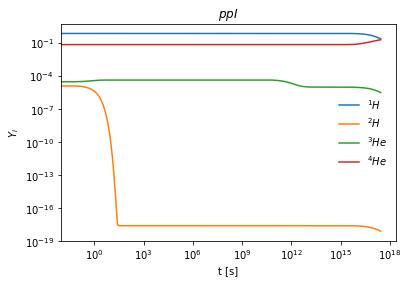

In [58]:



plot(T,H1,label  = r'$^{1}H$')
plot(T,H2,label  = r'$^{2}H$')
plot(T,He3,label = r'$^{3}He$')
plot(T,He4,label = r'$^{4}He$')

legend(frameon=False)


yscale('log')
xscale('log')
xlabel('t [s]')
ylabel(r'$Y_i$')
title(r'$ppI$')

show()

